# Практическая работа №0: Название работы
Выполнила студенка гр. 0381 Сарычева Александра. Вариант №18

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения
**Диада**-элемент сети, представляющий собой пару акторов и (возможную) связь между ними.
$$D_{ij}=(X_{ij}, X_{ji}), i \neq j$$
**Виды диад**:

Взаимная диада $D_ij=(1,1)$

Асимметричная диада $D_{ij}=(1,0), D_{ij}=(0,1)$

Нулевая диада $D_{ij}=(0,0)

**Цензус диад** - тройка чисел <M, A, N>, где $M=\sum_{i<j}X_{ij}X_{ji}$ - количество взаимный диад, $N={\binom{g}{2}}-A-M$ количество нулевых диад.

**Индекс взаимного Кауа-Паэлла** - характеристика изменения тенденции акторов в группе: $-\infty<p_{kp}\leq1$. Индекс взаимности основан на ожидании количества взаимных диад, предполагая, что выбор делается актороми случайным образом.

Фиксированный выбор
Предполагается, что каждый актор делает d выборов из g-1 актов, доступных для выбора.

Вероятность взаимного актора между любой произвольной парой равна $\frac{d^2}{(g-1)^2}$.

Математическое ожидание взаимных диад:
$$EM=\frac{g(g-1)}{2}-\frac{d^2}{(g-1)^2}=\frac{gd^2}{2(g-1)}$$

Вероятность того, что общая диада, в которой участвуют акторы, является взаимной диадой
$$P(i->j, j->i)=\frac{d}{g-1}(\frac{d}{g-1}+p_{kp}+\frac{g-1-d}{g-1})$$

Мат.ожидание взаимных диад с учетом данной вероятности:
$$E(M|p)=\frac{gd^2}{2(g-1)}(1-p_kp)+\frac{gd}{2}p_{kp}$$

Оценка $p_{kp}$ по методу моментов:
$$\hat{p_{kp}}=\frac{2(g-1)M-gd^2}{gd(g-1-d)}$$


Свободный выбор

Вероятность того, что связь будет взаимной для двух акторов
$$P=\frac{x_{i+}x_{j+}}{(g-1)^2}$$

Оценка $\hat{p_{kp}'}$ по методу моментов:
$$\hat{p_{kp}'}=\frac{2(g-1)^2M-L^2-L_2}{L(g-1)^2-L^2-L_2}$$

Индекс взаимности Бандиопадхьяйя - индекс, основанный на максимальном и минимальном значениях количества диад в сети.

**Вычисление доверительного интервала для оценки P**
Оценка параметра p:
$$\hat{p}= \frac{\sum_{i=1}^g \sum_{j=1}^g x_{ij}}{g(g-1)}$$ 

Доверительный интервал: $\hat{p}_{lower} \leq p \leq \hat{p}_{upper}$

$$\hat{p}_{lower} = \hat{p}-z_{\frac{\alpha}{2}}\sqrt{\frac{\hat{p}(1-\hat{p})}{g(g-1)}}$$


$$\hat{p}_{upper} = \hat{p}+z_{\frac{\alpha}{2}}\sqrt{\frac{\hat{p}(1-\hat{p})}{g(g-1)}}$$

где $z_{\frac{\alpha}{2}}: Ф(z_{\frac{\alpha}{2}})=0.5-\frac{\alpha}{2}$

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


In [64]:
install.packages('igraph')
install.packages("network")
install.packages("sna")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [65]:
library(network)
library(igraph)
library(sna)

 В.18 - Начальные условия:

 $g$=67  

 $p$=0,59   
 
 $P_o$=0,55  

 $\alpha$= 0,04

№1. С помощью библиотеки igraph смоделировать случайный орграф G𝑑 на основе модели Эрдеша—Реньи: G𝑑 = G (𝑔, 𝑝), где 𝑔 – количество акторов, 𝑝 – вероятность появления дуги между акторами. В R для модели случайного графа Эрдеша—Реньи существует функция erdos.renyi.game(). Ознакомьтесь с данной моделью и опишите её.

Данная функиция erdos.renyi.game(n, p.or.m, type = с("gnp", "gnm"), directed = FALSE, loops = FALSE) генерирует граф путем создания все возможных ребра с одинаковой постоянной вероятностью. Так, граф $G$ имеет $n$ вершен и $m$ ребер, и для каждого ребра вероятность того, что оно присутствует в графе, равна $p$. 

Таким образом, ребра выбираются равномерно случайным образом из набора всех возможных ребер(в этот набор также включает ребра петли, если loops параметр, отвечающий за добавление ребер петель, имеет значение TRUE.

 В переменной type указывается, создается ли граф $G(n,p)$ или $G(n,m)$. 

Логическая переменная directed отвечает за наличие направленности ребер.

In [66]:
g <- erdos.renyi.game(67, 0.59, type = "gnp", directed = TRUE, loops = FALSE)
g

IGRAPH ceaad47 D--- 67 2592 -- Erdos-Renyi (gnp) graph
+ attr: name (g/c), type (g/c), loops (g/l), p (g/n)
+ edges from ceaad47:
  [1]  3->1  4->1  7->1  8->1  9->1 10->1 14->1 15->1 16->1 18->1 19->1 20->1
 [13] 24->1 26->1 27->1 28->1 31->1 32->1 34->1 35->1 36->1 37->1 38->1 39->1
 [25] 41->1 42->1 43->1 48->1 49->1 50->1 52->1 54->1 55->1 57->1 58->1 61->1
 [37] 64->1 65->1 66->1 67->1  1->2  5->2  7->2  8->2 10->2 13->2 14->2 18->2
 [49] 19->2 20->2 21->2 23->2 24->2 26->2 27->2 28->2 32->2 37->2 38->2 39->2
 [61] 40->2 42->2 44->2 46->2 48->2 49->2 50->2 51->2 52->2 53->2 58->2 60->2
 [73] 63->2 64->2 66->2 67->2  1->3  2->3  4->3  8->3 11->3 12->3 14->3 15->3
 [85] 17->3 18->3 19->3 20->3 21->3 24->3 25->3 26->3 27->3 29->3 30->3 32->3
+ ... omitted several edges

№2. Отобразить полученный орграф.

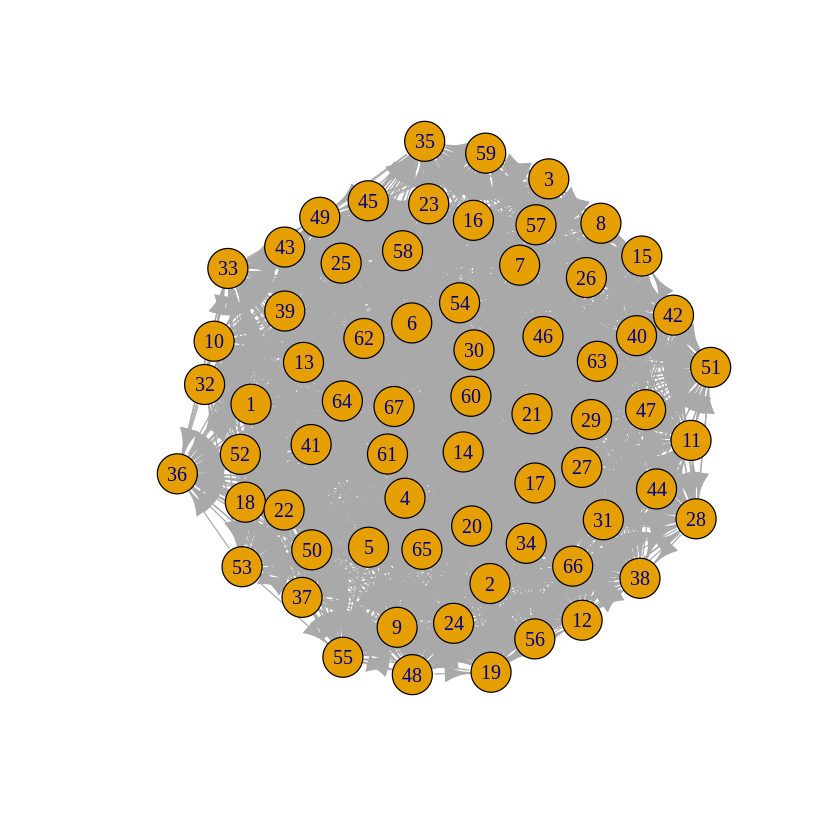

In [67]:
plot(g, layout = layout.fruchterman.reingold)

№3. Вычислить «пятичисловую сводку» для графа G𝑑.

In [68]:
matrix <- as.matrix(g, matrix.type = "adjacency")
matrix <- (as.matrix(matrix))

net <- network(matrix, directed=TRUE)

size <- network.size(net)
den <- gden(net, mode ="graph")
count_comp <- components(net)
d <- diameter(g)
coef <- gtrans(net, mode ="graph")
print(paste("Размер: ", size))
print(paste("Плотность: ", den))
print(paste("Число компонент: ", count_comp))
print(paste("Диаметр: ", d))
print(paste("Коэффициент кластеризации: ", coef))

[1] "Размер:  67"
[1] "Плотность:  0.586160108548168"
[1] "Число компонент:  1"
[1] "Диаметр:  2"
[1] "Коэффициент кластеризации:  0.585673758865248"


№4. Вычислить цензус диад. Сделать выводы.

In [69]:
#по формулам
trace <- function(A) {
  n <- dim(A)[1]
  tr <- 0
    for (k in 1:n) {
    l <- A[k,k]
    tr <- tr + l
  }
  return(tr[[1]])
}
matrix <- (as.matrix(matrix))
M <- 1/2*trace(matrix%*%matrix)
A <- trace(matrix%*%t(matrix))-trace(matrix%*%matrix)
N <- floor(factorial(size)/(factorial(2)*factorial(size-2))-trace(matrix%*%t(matrix))+M)
M
A
N
#с помощью функции
census <- dyad_census(g)
census

[1] 753

[1] 1086

[1] 372

$mut
[1] 753

$asym
[1] 1086

$null
[1] 372

Можно сделать вывод, что количество взаимных диад превышает количество нулевых диад. По данным результатам можно сказать, что взаимность выбора(отношений) между акторами составляет всего около 35% всех диад(753/2211=0,34), а почти половина диад ассиметрична и имеет отношения направленные только в одну строну(1086/2211=0,49).

№5. Вычислить оценку индекса взаимности Каца—Пауэла при фиксированом выборе акторов 𝑑 и при свободном выборе. Сделать выводы.

Фиксированное значение количества акторов $d$ было принято взять примерно равным средней степени входящих и выходящих связей: 39.

In [71]:
d <- 39
p_kp_fix <- (2*(size-1)*M-size*d**2)/(size*d*(size-1-d))

L <- sum(rowSums(matrix))
L_2<- sum(rowSums(matrix)**2)
p_kp_free <- (2*(size-1)**2*M-L**2+L_2)/(L*(size-1)**2-L**2+L_2)

print(paste("Оценка индекса при фиксированном выборе: ", p_kp_fix))
print(paste("Оценка индекса при свободном выборе: ", p_kp_free))


[1] "Оценка индекса при фиксированном выборе:  -0.0355912743972445"
[1] "Оценка индекса при свободном выборе:  -0.0122338096845965"


Можно сделать вывод, что оценка взаимности Каца-Паэла при фиксированном выборе акторов, равным средней степени входящих или выходящих ребер, немного больше чем оценка при свободном выборе. Однако обе эти оценки лежат вблизи 0, из чего можно следует, что тенденция к взаимности(склонности акторов отвечать взаимностью на выбор) отсутствует.

№6. Вычислить вероятность того, что связь будет взаимной для каждого случая.

In [17]:
P_fix <- d/(size-1)*(d/(size-1)+p_kp_fix*(size-1-d)/(size-1))

P_free <- rowSums(matrix)*colSums(matrix)/(size-1)**2

print(paste("Вероятность при фиксированном выборе: ", P_fix))
print("Вероятность при свободном выборе: ")
as.vector(P_free)
print(paste("Средняя вероятность при свободном выборе: ", sum(P_free)/length(P_free)))


[1] "Вероятность при фиксированном выборе:  0.343283582089552"
[1] "Вероятность при свободном выборе: "


[1] 0.4146006 0.3471074 0.3213958 0.3764922 0.3305785 0.3581267 0.3314968
 [8] 0.3822314 0.3902663 0.3397612 0.3764922 0.4040404 0.3213958 0.3663912
[15] 0.4132231 0.3402204 0.4244720 0.3948577 0.3953168 0.3615702 0.3402204
[22] 0.3512397 0.3849862 0.3482553 0.3535354 0.3057851 0.2803030 0.2754821
[29] 0.3142792 0.2662994 0.3737374 0.2954545 0.3856749 0.2846648 0.3948577
[36] 0.3553719 0.3227732 0.3751148 0.3856749 0.3838384 0.3057851 0.3719008
[43] 0.2463269 0.3471074 0.2938476 0.4338843 0.3553719 0.2887971 0.3142792
[50] 0.3636364 0.4047291 0.3859045 0.2809917 0.2972911 0.2561983 0.3388430
[57] 0.4118457 0.3576676 0.3200184 0.3760331 0.4244720 0.3257576 0.3133609
[64] 0.3223140 0.3471074 0.3856749 0.2954545

[1] "Средняя вероятность при свободном выборе:  0.348241574496663"


№7. Вычислить индекс взаимности Бандиопадхьяйя. Сделать выводы.

In [101]:
f_t <- function (g, t, matrix){
    sum_x <- sum(rowSums(matrix)[1:t])
    res <- sum_x-t*(g-1)-factorial(t)/(factorial(2)*factorial(t-2))
    return (res)
}
g_t <- function (g, t, matrix){
    sum_x <- sum((rowSums(matrix))[1:t])
    min_f <- sum(min(t, rowSums(matrix)[(t+1):g]))
    res <- sum_x-t*(t-1)-min_f 
    return (res)
}

M_min <- f_t(size, 2, matrix)
for (i in 2:size){
    M_min <- max(f_t(size, i, matrix), M_min)
}
M_max <- g_t(size, 2, matrix)
for (i in 2:(size-1)){
    M_max_t <- max(g_t(size, i, matrix), M_max)
}
M_max <- 1/2*(sum(colSums(matrix)[1:size])-M_max_t)
p_b <- (M-M_min)/(M_max-M_min)
p_b


[1] 0.6150929

Индекс взаимности Бандиопадхьяйя значительно больше индекса взаимности Каца—Пауэла и, следовательно, имеет большую тенденцию к взаимности.

№8. Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе G𝑑 имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔 − 1), 1/2) при уровне значимости 𝛼. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.

In [60]:
a <- 0.04
p <- 1/2
binom.test(sum(matrix), size*(size-1), p)


	Exact binomial test

data:  sum(matrix) and size * (size - 1)
number of successes = 2611, number of trials = 4422, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.5757941 0.6049999
sample estimates:
probability of success 
             0.5904568 


По результатам теста видно, что значение p-value недостаточно велико, чтобы можно было бы принять данную нулевую гипотезу(p-value < 𝛼=0.04). Следовательно, нулевая гипотеза отклоняется, а максимальный уровень значимости, при котором нулевая гипотеза не будет отвергнута, должен быть равен p-value, которое в данном случае < 2.2е-16.

№9. Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе G𝑑 имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔−1), 𝑃0) при уровне
значимости 𝛼. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.

In [61]:
a <- 0.04
p <- 0.55
binom.test(sum(matrix), size*(size-1), p)


	Exact binomial test

data:  sum(matrix) and size * (size - 1)
number of successes = 2611, number of trials = 4422, p-value =
6.178e-08
alternative hypothesis: true probability of success is not equal to 0.55
95 percent confidence interval:
 0.5757941 0.6049999
sample estimates:
probability of success 
             0.5904568 


По результатам теста видно, что значение p-value недостаточно велико, чтобы можно было бы принять данную нулевую гипотезу(p-value < 𝛼). Следовательно, нулевая гипотеза отклоняется, а максимальный уровень значимости, при котором нулевая гипотеза не будет отвергнута, должен быть равен p-value, которое в данном случае равно 6.178е-8.

№10. Построить доверительный интервал для оценки параметра 𝑝 с доверительной надёжностью (1 − 𝛼). Сделать выводы.

In [86]:
a <- 0.04 #заданное значение
p <- 0.59 #заданное значение
p_estimate <- (sum(matrix))/(size*(size-1))
p_estimate

laplace <- 0.5 - (a/2)
laplace

z <- 2.34 #Значение функции Лапласа согласно таблице

p_lower <- p_estimate - z * sqrt((p_estimate * (1 - p_estimate))/(size * (size - 1)))
p_upper <- p_estimate + z * sqrt((p_estimate * (1 - p_estimate))/(size * (size - 1)))                      
p_lower
p_upper
     


[1] 0.5861601

[1] 0.48

[1] 0.5688288

[1] 0.6034914

Таким образом, был получен доверительный интервал [0.569; 0.603] для параметра $p$ с доверительной надежностью (1-$α$)=0,96. В этом же диапазоне и лежит заданное значение p=0.59.

## Выводы

В ходе данной практической работы был произведен статистический анализ случайно смоделированного ориентированного графа, котторый был создан и изображен с помощью библиотеки igraph. Для графа состоящего из 67 вершин и вероятностью появления дуги, равной 0,59, была вычислена пятичисловая сводка, цензус диад, по результатом которого было определено количество диад каждого вида, а также вычислен индекс взаимности Каца—Пауэла при фиксированном наборе акторов, равном среднему числу входящих ребер, и свободном наборе, которые в результате оказались близки к 0.
Кроме этого был также вычислен индекс взаимности Бандиопадьяйя, который был равен 0,61 и показывал, что тенденция к взаимности все-таки имеется. 
Были проверены простые гипотезы о распределении числа дуг в данном орграфе, в результате проверки которых данные гипотезы были отвергнуты, и построен доверительный интервал для параметра p.